## Installation of the libraries 

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Import of libraries 

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data recovery via a csv file

In [5]:

df = pd.read_csv('validation_metro.csv',sep=';')


## Raw data 

In [6]:
print(df.head())

         jour  code_stif_trns  code_stif_res  code_stif_arret   libelle_arret  \
0  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
1  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
2  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
3  2024-01-22             100          110.0            692.0  PTE D.VILLETTE   
4  2024-01-22             100          110.0            693.0   PTE MONTREUIL   

     ida               categorie_titre  nb_vald  
0  72064                     Amethyste      292  
1  72064                 Autres titres      337  
2  72064                     Imagine R     1539  
3  72430  Contrat Solidarité Transport     2160  
4  71710  Contrat Solidarité Transport     2277  


## Example of a visualisation with the station PTE MONTREUIL

In [7]:
df_pte_montreuil = df[df['libelle_arret'] == 'PTE MONTREUIL']

In [8]:
print(df_pte_montreuil.head())

           jour  code_stif_trns  code_stif_res  code_stif_arret  \
4    2024-01-22             100          110.0            693.0   
5    2024-01-22             100          110.0            693.0   
6    2024-01-22             100          110.0            693.0   
7    2024-01-22             100          110.0            693.0   
956  2024-01-23             100          110.0            693.0   

     libelle_arret    ida               categorie_titre  nb_vald  
4    PTE MONTREUIL  71710  Contrat Solidarité Transport     2277  
5    PTE MONTREUIL  71710                Forfait Navigo     5137  
6    PTE MONTREUIL  71710                     Imagine R     1660  
7    PTE MONTREUIL  71710                    NON DEFINI      234  
956  PTE MONTREUIL  71710               Forfaits courts       45  


In [9]:
df_pte_montreuil_clean = df_pte_montreuil[['jour','libelle_arret','nb_vald']]

In [10]:
print(df_pte_montreuil_clean.head())

           jour  libelle_arret  nb_vald
4    2024-01-22  PTE MONTREUIL     2277
5    2024-01-22  PTE MONTREUIL     5137
6    2024-01-22  PTE MONTREUIL     1660
7    2024-01-22  PTE MONTREUIL      234
956  2024-01-23  PTE MONTREUIL       45


In [11]:
print(df_pte_montreuil_clean[df_pte_montreuil_clean['jour'] == '2024-01-01' ])

              jour  libelle_arret  nb_vald
427103  2024-01-01  PTE MONTREUIL      214
427107  2024-01-01  PTE MONTREUIL     1285
519907  2024-01-01  PTE MONTREUIL       55
640798  2024-01-01  PTE MONTREUIL       37
747712  2024-01-01  PTE MONTREUIL      327
747713  2024-01-01  PTE MONTREUIL     1068
747714  2024-01-01  PTE MONTREUIL      553


In [12]:
df_pte_montreuil_sum = df_pte_montreuil_clean.groupby('jour')['nb_vald'].sum().reset_index(name='somme_valeurs')

In [13]:
print(df_pte_montreuil_sum.head())

         jour  somme_valeurs
0  2024-01-01           3539
1  2024-01-02           7095
2  2024-01-03           8034
3  2024-01-04           8231
4  2024-01-05           8884


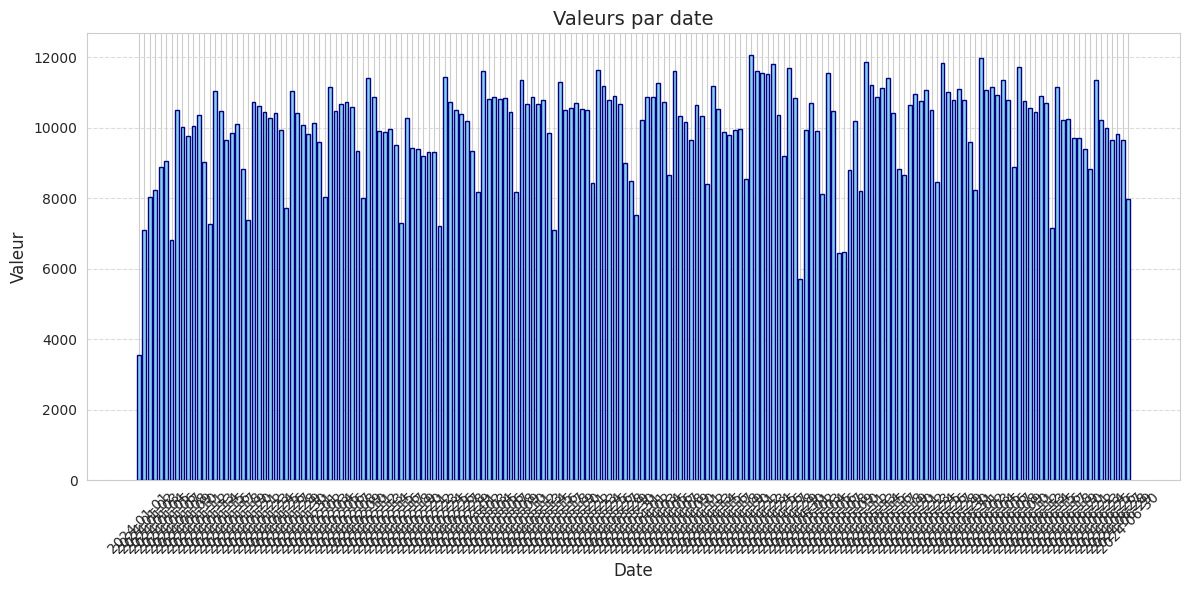

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
plt.bar(df_pte_montreuil_sum['jour'], df_pte_montreuil_sum['somme_valeurs'], width=0.7, color='skyblue', edgecolor='navy')

# Personnaliser le graphique
plt.title('Valeurs par date', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Ajuster automatiquement la mise en page
plt.tight_layout()



## Other visualizaion for the station CHATILLON-MON.

21300
7


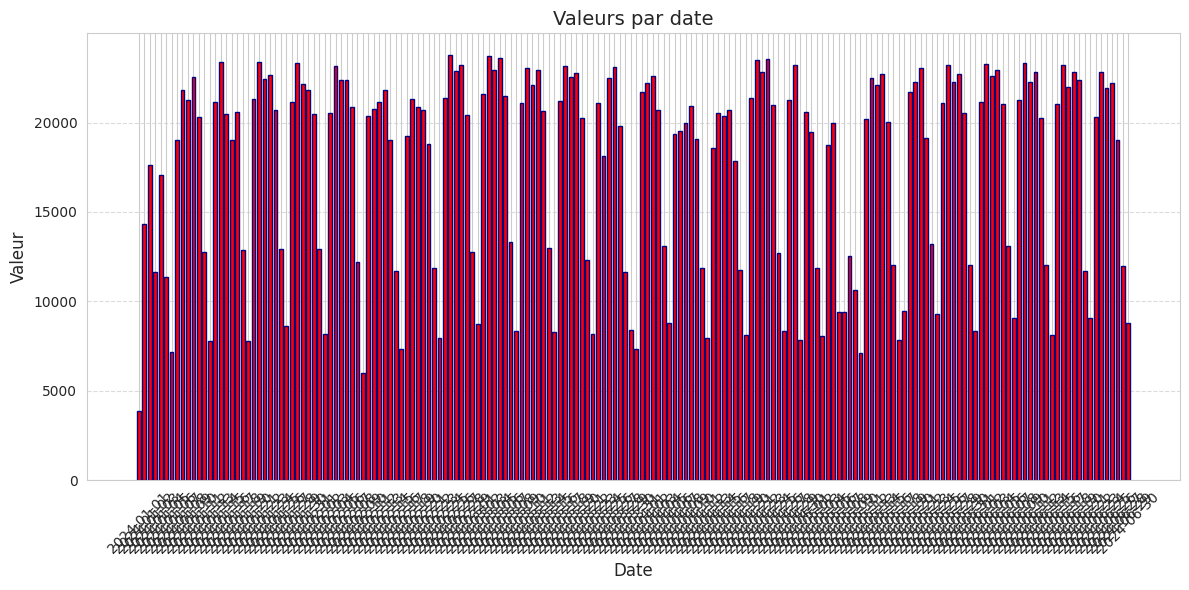

In [15]:
df_chatillon = df[df['libelle_arret'] == 'CHATILLON-MON.']
df_chatillon_clean = df_chatillon[['jour','libelle_arret','categorie_titre','nb_vald']]
print(df_chatillon_clean[df_chatillon_clean['jour'] == '2024-01-22' ]['nb_vald'].sum())
print(df_chatillon_clean[df_chatillon_clean['jour'] == '2024-01-22' ].shape[0])
df_chatillon_sum = df_chatillon_clean.groupby('jour')['nb_vald'].sum().reset_index(name='somme_valeurs')

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
plt.bar(df_chatillon_sum['jour'], df_chatillon_sum['somme_valeurs'], width=0.7, color='red', edgecolor='navy')

# Personnaliser le graphique
plt.title('Valeurs par date', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Ajuster automatiquement la mise en page
plt.tight_layout()

## I want to see according to the type of pass

In [16]:
df_test = df[df['libelle_arret'] == 'CHATILLON-MON.']

In [17]:
print(df_test.head())

            jour  code_stif_trns  code_stif_res  code_stif_arret  \
715   2024-01-23             100          110.0            171.0   
3000  2024-03-06             100          110.0            171.0   
3001  2024-03-06             100          110.0            171.0   
5229  2024-03-02             100          110.0            171.0   
5230  2024-03-02             100          110.0            171.0   

       libelle_arret     ida               categorie_titre  nb_vald  
715   CHATILLON-MON.  461505                     Amethyste      338  
3000  CHATILLON-MON.  461505                Forfait Navigo    13700  
3001  CHATILLON-MON.  461505                    NON DEFINI      820  
5229  CHATILLON-MON.  461505  Contrat Solidarité Transport     1344  
5230  CHATILLON-MON.  461505               Forfaits courts       78  


In [18]:
df_test_clean = df_test[['jour','libelle_arret','categorie_titre','nb_vald']]
print(df_test_clean)
df_test_sum = df_test_clean.groupby(['jour','categorie_titre'])['nb_vald'].sum().reset_index(name='somme_valeurs')
print(df_test_sum)

              jour   libelle_arret               categorie_titre  nb_vald
715     2024-01-23  CHATILLON-MON.                     Amethyste      338
3000    2024-03-06  CHATILLON-MON.                Forfait Navigo    13700
3001    2024-03-06  CHATILLON-MON.                    NON DEFINI      820
5229    2024-03-02  CHATILLON-MON.  Contrat Solidarité Transport     1344
5230    2024-03-02  CHATILLON-MON.               Forfaits courts       78
...            ...             ...                           ...      ...
857493  2024-03-12  CHATILLON-MON.               Forfaits courts       42
858488  2024-03-13  CHATILLON-MON.                     Amethyste      342
858489  2024-03-13  CHATILLON-MON.                 Autres titres     2040
858490  2024-03-13  CHATILLON-MON.  Contrat Solidarité Transport     2021
858491  2024-03-13  CHATILLON-MON.                     Imagine R     3607

[1274 rows x 4 columns]
            jour               categorie_titre  somme_valeurs
0     2024-01-01         

In [19]:
pivot = df_test_sum.pivot_table(index='jour', columns='categorie_titre', values='somme_valeurs', aggfunc='sum')
print(pivot)

categorie_titre  Amethyste  Autres titres  Contrat Solidarité Transport  \
jour                                                                      
2024-01-01             122            665                           593   
2024-01-02             231           1691                          1431   
2024-01-03             284           1866                          1691   
2024-01-04             160           1145                          1000   
2024-01-05             325           1923                          1798   
...                    ...            ...                           ...   
2024-06-26             330           2212                          2078   
2024-06-27             265           2207                          2001   
2024-06-28             343           1971                          1923   
2024-06-29             253           1682                          1378   
2024-06-30             261           1181                          1129   

categorie_titre  Forfait

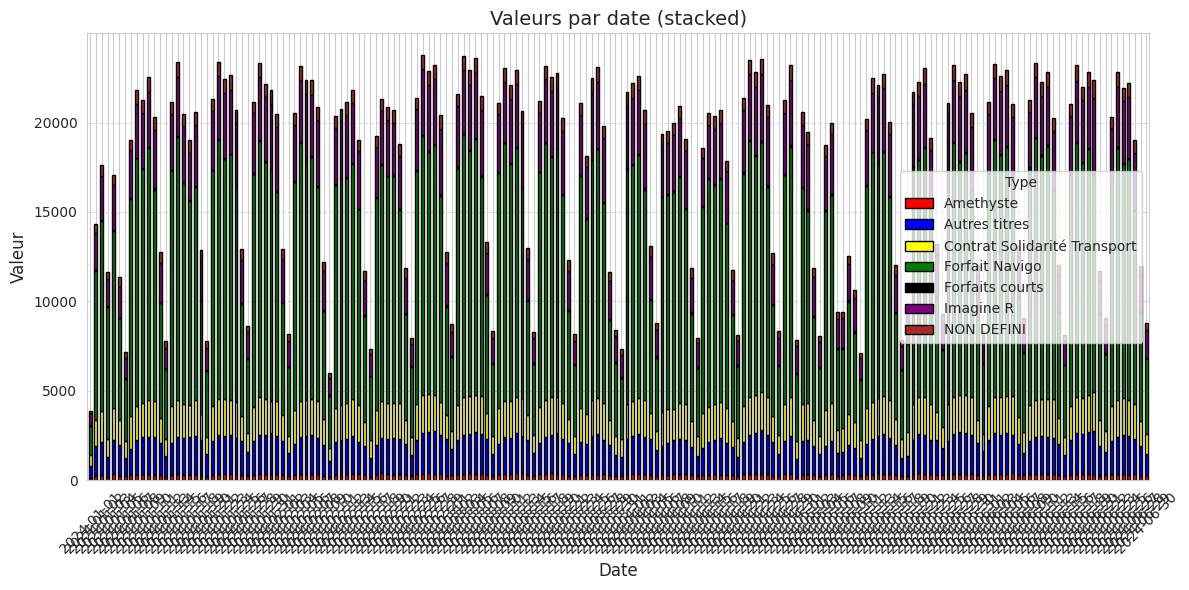

In [20]:
# Plot
sns.set_style("whitegrid")
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['red','blue','yellow','green','black','purple','brown'],  # adapt if you have more categories
    edgecolor='black'
)

plt.title('Valeurs par date (stacked)', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Type')  # or whatever your stacking variable is
plt.show()

## I want a to see for date intervals while removing the week-ends 

In [31]:
df_test_clean2 = df_test[['jour','libelle_arret','categorie_titre','nb_vald']]

# Convert jour to datetime if not already
df_test_clean2['jour'] = pd.to_datetime(df_test_clean2['jour'])

# Filter between two dates (example: May 1st to May 15th)
start_date = '2024-05-01'
end_date = '2024-05-15'
df_filtered = df_test_clean2[(df_test_clean2['jour'] >= start_date) & (df_test_clean2['jour'] <= end_date)]


In [32]:
pd.options.mode.copy_on_write = True
df_test_clean2 = df_test[['jour','libelle_arret','categorie_titre','nb_vald']]

# Convert jour to datetime if not already
df_test_clean2['jour'] = pd.to_datetime(df_test_clean2['jour'])
df_test_sum2 = df_test_clean2.groupby(['jour','categorie_titre'])['nb_vald'].sum().reset_index(name='somme_valeurs')

In [46]:
# Filter between two dates (example: May 1st to May 15th)
start_date = '2024-05-01'
end_date = '2024-06-15'
df_filtered2 = df_test_sum2[(df_test_sum2['jour'] >= start_date) & (df_test_sum2['jour'] <= end_date)]
df_filtered2 = df_filtered2[df_filtered2['jour'].dt.weekday < 5]

In [47]:
print( df_filtered2)

           jour               categorie_titre  somme_valeurs
847  2024-05-01                     Amethyste            194
848  2024-05-01                 Autres titres            987
849  2024-05-01  Contrat Solidarité Transport           1024
850  2024-05-01                Forfait Navigo           3751
851  2024-05-01               Forfaits courts             23
...         ...                           ...            ...
1157 2024-06-14  Contrat Solidarité Transport           2150
1158 2024-06-14                Forfait Navigo          11711
1159 2024-06-14               Forfaits courts             57
1160 2024-06-14                     Imagine R           3226
1161 2024-06-14                    NON DEFINI            741

[231 rows x 3 columns]


In [48]:
pivot2 = df_filtered2.pivot_table(index='jour', columns='categorie_titre', values='somme_valeurs', aggfunc='sum')
print(pivot2)

categorie_titre  Amethyste  Autres titres  Contrat Solidarité Transport  \
jour                                                                      
2024-05-01             194            987                          1024   
2024-05-02             309           1883                          2042   
2024-05-03             324           1897                          2082   
2024-05-06             308           1593                          2030   
2024-05-07             370           1848                          2078   
2024-05-08             244           1285                          1283   
2024-05-09             262           1332                          1311   
2024-05-10             319           1623                          1758   
2024-05-13             333           1667                          2031   
2024-05-14             315           1974                          2062   
2024-05-15             385           2087                          2141   
2024-05-16             34

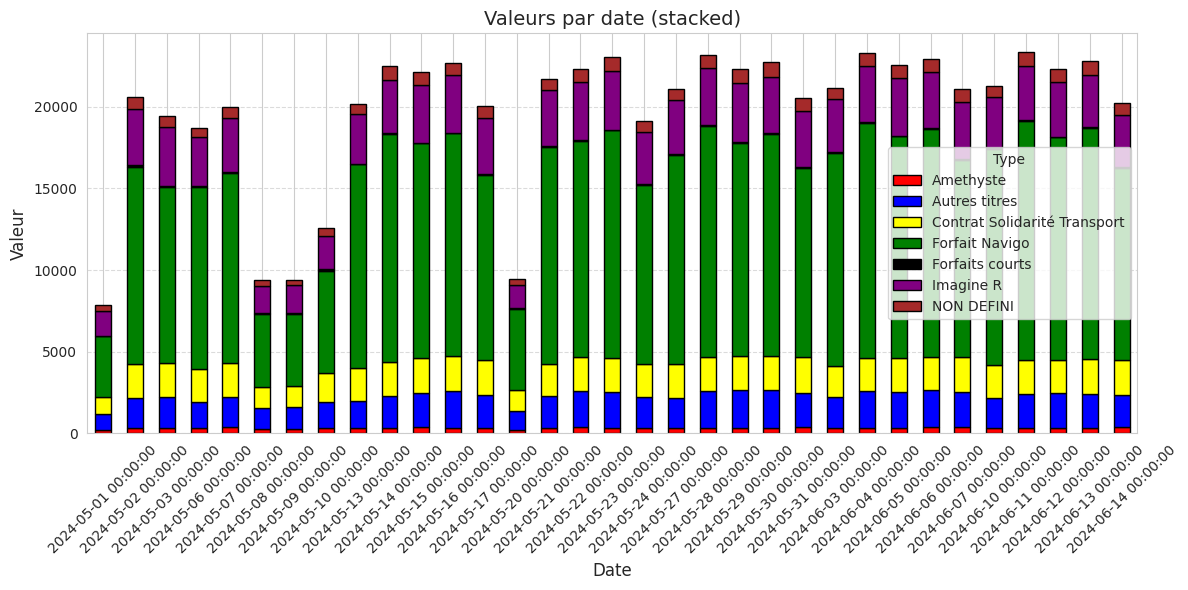

In [49]:
# Plot
sns.set_style("whitegrid")
pivot2.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['red','blue','yellow','green','black','purple','brown'],  # adapt if you have more categories
    edgecolor='black'
)

plt.title('Valeurs par date (stacked)', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Type')  # or whatever your stacking variable is
plt.show()